# Problem Set 5

## Fulin Guo

### 1

#### a.

In [245]:
import numpy as np
import matplotlib.pyplot as plt
income=np.loadtxt('/Users/fulinguo/Desktop/persp-model-econ_W19/ProblemSets/PS5/data/incomes.txt')

Text(0, 0.5, 'Percent of incomes')

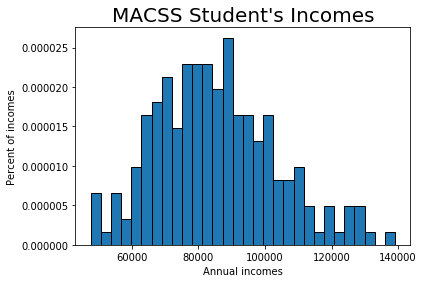

In [246]:
num=30
plt.hist(income, num, density=True,edgecolor='k')
plt.title("MACSS Student's Incomes", fontsize=20)
plt.xlabel('Annual incomes')
plt.ylabel('Percent of incomes')

#### b.

In [247]:
import scipy.stats
import math
import scipy.integrate
import scipy.optimize as opt
def logpdf(x,mu,sigma):
    ans=(1/(sigma*np.sqrt(2*np.pi)*x))*np.exp(-(((np.log(x)-mu)**2)/(2*(sigma**2))))
    return ans
def data_m(x):
    mean=x.mean()
    std=x.std()
    return mean,std
def model_m(mu,sigma):
    # xfx=lambda x: x*logpdf(x,mu,sigma)
    #(mean,m_err)=scipy.integrate.quad(xfx,0,+np.inf)
    mean=math.exp(mu+0.5*sigma**2)
    #x2fx=lambda x:((x - mean)**2)*logpdf(x,mu,sigma) 
    #(var,v_err)=scipy.integrate.quad(x2fx,0,+np.inf)
    std=mean*math.sqrt(math.exp(sigma**2)-1)
    return mean, std
def err(x,mu,sigma,simple):
    m_data,v_data=data_m(x)
    moms_data=np.array([[m_data],[v_data]])
    m_model, v_model=model_m(mu,sigma)
    moms_model=np.array([[m_model],[v_model]])
    if simple:
        err_vec=moms_model-moms_data
    else:
        err_vec=(moms_model-moms_data)/moms_data
    return err_vec
def crit(params, *args):
    mu=params[0]
    sigma=params[1]
    x,W=args
    error=err(x,mu,sigma,simple=False)
    crit_val=error.T @ W @ error
    return crit_val

In [248]:
mu_init=10
sig_init=0.5
params_init=[mu_init, sig_init]
W_hat=np.eye(2)
gmm_args =(income, W_hat)
results = opt.minimize(crit, params_init, args=(gmm_args),method='L-BFGS-B', bounds=((None, None), (1e-10, None)))
mu_GMM1,sig_GMM1 = results.x

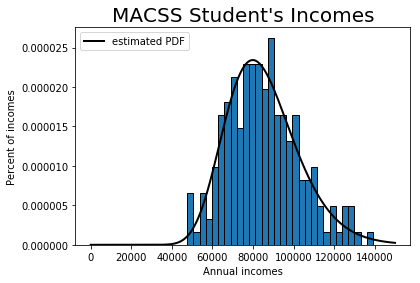

In [251]:
num_bins = 30
count, bins, ignored = plt.hist(income, num_bins, density=True,
                                edgecolor='k')
plt.title("MACSS Student's Incomes", fontsize=20)
plt.xlabel('Annual incomes')
plt.ylabel('Percent of incomes')
dist_pts = np.linspace(0.0001, 150000, 150000)
plt.plot(dist_pts, logpdf(dist_pts,mu_GMM1,sig_GMM1),
         linewidth=2, color='k', label='estimated PDF')
plt.legend(loc='upper left')

In [252]:
mean_data,var_data= data_m(income)
mean_model,var_model=model_m(mu_GMM1,sig_GMM1)
err1 = err(income,mu_GMM1, sig_GMM1, True).reshape(2,)
print('mu_GMM1:',mu_GMM1,'sig_GMM1:',sig_GMM1)
print('the value of the GMM criterion function at the estimated parameter values is:', results.fun[0][0])
print('average income from data=', mean_data, ', standard deviation of income from data=', var_data)
print('average income from GMM=', mean_model, ', standard deviation of income from GMM=', var_model)
print('Error vector=', err1)

mu_GMM1: 11.3318808543205 sig_GMM1: 0.20869663038572484
the value of the GMM criterion function at the estimated parameter values is: 2.2184833798327347e-14
average income from data= 85276.82360625811 , standard deviation of income from data= 17992.542128046523
average income from GMM= 85276.8239494969 , standard deviation of income from GMM= 17992.53944911269
Error vector= [ 0.00034324 -0.00267893]


We could see that the average income from data is 85276.82 and from GMM estimation is also 85276.82. The standard deviation of income from data is 17992.54 and from the GMM estimation is also 17992.54. Therefore, the data moments and the model moments are very close.

#### c.

In [253]:
import numpy.linalg as lin
def get_Err_mat2(income,mu,sigma,simple=False):
    R=2
    N=len(income)
    Err_mat = np.zeros((R, N))
    mean_model, var_model = model_m(mu, sigma)
    if simple:
        Err_mat[0, :]=income-mean_model
        Err_mat[1, :]=((mean_data-income)**2)-var_model
    else:
        Err_mat[0, :]=(income - mean_model)/ mean_model
        Err_mat[1, :]=(((mean_data-income)**2)-var_model)/var_model
    
    return Err_mat

In [254]:
Err_mat=get_Err_mat2(income,mu_GMM1,sig_GMM1,False)
VCV2=(1/income.shape[0])*(Err_mat @ Err_mat.T)
W_hat2=lin.inv(VCV2)
print(VCV2)
print(W_hat2)

[[4.45167061e-02 1.68385311e+03]
 [1.68385311e+03 9.54184674e+08]]
[[ 2.40701668e+01 -4.24767094e-05]
 [-4.24767094e-05  1.12297396e-09]]


In [256]:
params_init=np.array([mu_GMM1, sig_GMM1])
gmm_args=(income,W_hat2)
results_2=opt.minimize(crit, params_init, args=(gmm_args),
                       method='L-BFGS-B', bounds=((None, None), (1e-10, None)))
mu_GMM2,sig_GMM2=results.x
print('mu_GMM2=',mu_GMM2,' sig_GMM2=',sig_GMM2)
print('the value of the GMM criterion function at the estimated parameter values is:', results_2.fun[0][0])

mu_GMM2= 11.3318808543205  sig_GMM2= 0.20869663038572484
the value of the GMM criterion function at the estimated parameter values is: 3.9000171460277093e-16


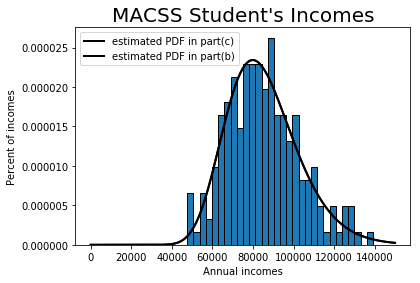

In [257]:
num_bins = 30
count, bins, ignored = plt.hist(income, num_bins, density=True,
                                edgecolor='k')
plt.title("MACSS Student's Incomes", fontsize=20)
plt.xlabel('Annual incomes')
plt.ylabel('Percent of incomes')
dist_pts = np.linspace(0.0001, 150000, 150000)
plt.plot(dist_pts, logpdf(dist_pts,mu_GMM2,sig_GMM2),
         linewidth=2, color='k', label='estimated PDF in part(c)')
plt.plot(dist_pts, logpdf(dist_pts,mu_GMM1,sig_GMM1),
         linewidth=2, color='k', label='estimated PDF in part(b)')
plt.legend(loc='upper left')
plt.legend(loc='upper left')

In [259]:
print('mu_GMM2=',mu_GMM2,' sig_GMM2=',sig_GMM2)
mean_data2,var_data2= data_m(income)
mean_model2,var_model2=model_m(mu_GMM2,sig_GMM2)
err2= err(income,mu_GMM2, sig_GMM2, True).reshape(2,)
print('the value of the GMM criterion function at the estimated parameter values is:', results_2.fun[0][0])
print('average income from data=', mean_data2, ', standard deviation of income from data=', var_data2)
print('average income from GMM=', mean_model2, ', standard deviation of income from GMM=', var_model2)
print('Error vector=', err2)

mu_GMM2= 11.3318808543205  sig_GMM2= 0.20869663038572484
the value of the GMM criterion function at the estimated parameter values is: 3.9000171460277093e-16
average income from data= 85276.82360625811 , standard deviation of income from data= 17992.542128046523
average income from GMM= 85276.8239494969 , standard deviation of income from GMM= 17992.53944911269
Error vector= [ 0.00034324 -0.00267893]


We could see that the average income from data is about 85276.82 and from GMM estimation is also about 85276.82. The standard deviation of income from data is about 17992.54 and from the GMM estimation is also about 17992.54. Therefore, the data moments and the model moments are very close.

#### d.

In [260]:
def data_moments3(x):
    perc1=x[x<75000].shape[0]/ x.shape[0]
    perc2=(x[(x>=75000)&(x<100000)].shape[0]/x.shape[0])
    perc3=(x[(x>=100000)].shape[0]/x.shape[0])
    return perc1,perc2,perc3
def model_moments3(mu,sigma):
    xfx = lambda x: logpdf(x,mu,sigma)
    (bpct_1_mod, bp_1_err)=scipy.integrate.quad(xfx, 0, 75000)
    (bpct_2_mod, bp_2_err)=scipy.integrate.quad(xfx, 75000, 100000)
    (bpct_3_mod, bp_3_err)=scipy.integrate.quad(xfx, 100000, +np.inf)
    return bpct_1_mod, bpct_2_mod, bpct_3_mod
def err_vec3(x,mu,sigma,simple):
    bpct_1_dat, bpct_2_dat, bpct_3_dat=data_moments3(x)
    moms_data=np.array([[bpct_1_dat], [bpct_2_dat], [bpct_3_dat]])
    bpct_1_mod, bpct_2_mod, bpct_3_mod=model_moments3(mu,sigma)
    moms_model=np.array([[bpct_1_mod], [bpct_2_mod], [bpct_3_mod]])
    if simple:
        err_vec=moms_model - moms_data
    else:
        err_vec=(moms_model - moms_data) / moms_data
    return err_vec
def crit3(params, *args):
    mu,sigma=params
    x,W=args
    err=err_vec3(x,mu,sigma,simple=False)
    crit_val = err.T @ W @ err 
    return crit_val

In [261]:
mu_init=11
sig_init=0.2
params_init = np.array([mu_init, sig_init])
W_hat1_3 = np.eye(3)
gmm_args = (income,W_hat1_3)
results_3 = opt.minimize(crit3, params_init, args=(gmm_args),
                       method='L-BFGS-B', bounds=((None, None), (1e-10, None)))
mu_GMM1_3, sig_GMM1_3 = results_3.x
print('mu_GMM1_3=', mu_GMM1_3, ' sig_GMM1_3=', sig_GMM1_3)

mu_GMM1_3= 11.335681325682913  sig_GMM1_3= 0.21059845527059384


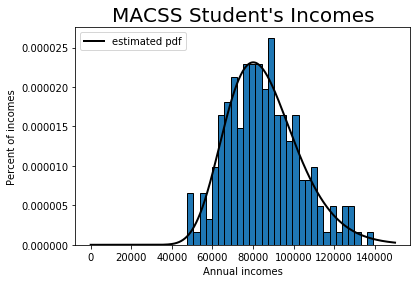

In [264]:
num_bins=30
count, bins, ignored = plt.hist(income, num_bins, density=True,edgecolor='k')
plt.title("MACSS Student's Incomes",fontsize=20)
plt.xlabel('Annual incomes')
plt.ylabel('Percent of incomes')
dist_pts = np.linspace(0.0001, 150000, 150000)
plt.plot(dist_pts, logpdf(dist_pts,mu_GMM1_3,sig_GMM1_3),
         linewidth=2, color='k', label='estimated pdf')
plt.legend(loc='upper left')

In [265]:
print('mu_GMM3=',mu_GMM1_3,' sig_GMM3=',sig_GMM1_3)
m13,m23,m33= data_moments3(income)
m_mode13,m_mode23,m_mode33=model_moments3(mu_GMM1_3,sig_GMM1_3)
err3= err_vec3(income,mu_GMM1_3, sig_GMM1_3, True).reshape(3,)
print('the value of the GMM criterion function at the estimated parameter values is:', results_3.fun[0][0])
print('the first data moment=',m13, ', the second data moment=',m23,', the third data moment=',m33)
print('the first model moment=',m_mode13, ', the second model moment=',m_mode23,', the third model moment=',m_mode23)
print('Error vector=', err3)

mu_GMM3= 11.335681325682913  sig_GMM3= 0.21059845527059384
the value of the GMM criterion function at the estimated parameter values is: 3.238799432760124e-15
the first data moment= 0.3 , the second data moment= 0.5 , the third data moment= 0.2
the first model moment= 0.30000000785030917 , the second model moment= 0.5000000022181954 , the third model moment= 0.5000000022181954
Error vector= [ 7.85030918e-09  2.21819541e-09 -1.00685043e-08]


The three data moments are 0.3, 0.5, 0.2, and the three model moments are all very close to their corresponding data moment. We could also see that all elements in the error vector are below $10^{-8}$, so the three data moments and three model moments are close.

#### e.

In [266]:
def get_Err_mat3(income, mu, sigma,simple=False):
    R = 3
    N = len(income)
    Err_mat = np.zeros((R, N))
    p1, p2, p3 = model_moments3(mu, sigma)
    if simple:
        pd1=(income<75000)
        Err_mat[0, :]=pd1-p1
        pd2=(income>=75000)&(income<100000)
        Err_mat[1, :]=pd2-p2
        pd3=(income>=1000000)
        Err_mat[2, :]=pd3-p3
    else:
        pd1=(income<75000)
        Err_mat[0, :] = (pd1- p1) / p1
        pd2=(income>=75000)&(income<100000)
        Err_mat[1, :] = (pd2-p2) /p2
        pd3=(income>=100000)
        Err_mat[2, :] = (pd3-p3)/p3
    return Err_mat

In [267]:
Err_mat3=get_Err_mat3(income,mu_GMM1_3,sig_GMM1_3,True)
VCV2_3=(1/income.shape[0])*(Err_mat3 @ Err_mat3.T)
W_hat2_3=lin.pinv(VCV2_3)
print(VCV2_3)
print(W_hat2_3)

[[ 2.10000000e-01 -1.50000000e-01  1.57006174e-09]
 [-1.50000000e-01  2.50000000e-01  4.43639066e-10]
 [ 1.57006174e-09  4.43639066e-10  3.99999960e-02]]
[[ 8.33333333e+00  5.00000000e+00 -3.82551117e-07]
 [ 5.00000000e+00  7.00000000e+00 -2.73894581e-07]
 [-3.82551117e-07 -2.73894581e-07  2.50000025e+01]]


In [270]:
params_init = np.array([mu_GMM1_3,sig_GMM1_3])
gmm_args = (income,W_hat2_3)
results2_3=opt.minimize(crit3, params_init, args=(gmm_args),
                          method='L-BFGS-B', bounds=((None, None), (1e-10, None)))
mu_GMM2_3,sig_GMM2_3=results2_3.x
print('mu_GMM2_3=', mu_GMM2_3, ' sig_GMM2_3=', sig_GMM2_3)
print('the value of the GMM criterion function at the estimated parameter values is:', results2_3.fun[0][0])

mu_GMM2_3= 11.335681325682913  sig_GMM2_3= 0.21059845527059384
the value of the GMM criterion function at the estimated parameter values is: 7.036415349843903e-14


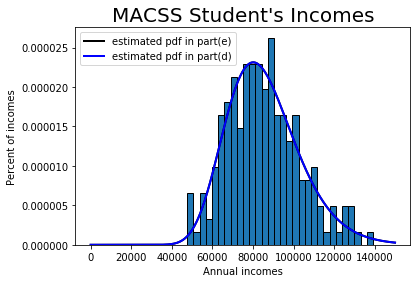

In [271]:
num_bins = 30
count, bins, ignored = plt.hist(income, num_bins, density=True,
                                edgecolor='k')
plt.title("MACSS Student's Incomes", fontsize=20)
plt.xlabel('Annual incomes')
plt.ylabel('Percent of incomes')
dist_pts = np.linspace(0.0001, 150000, 150000)
plt.plot(dist_pts, logpdf(dist_pts,mu_GMM2_4,sig_GMM2_4),
         linewidth=2, color='k', label='estimated pdf in part(e)')
plt.plot(dist_pts, logpdf(dist_pts,mu_GMM1_3,sig_GMM1_3),
         linewidth=2, color='b', label='estimated pdf in part(d)')
plt.legend(loc='upper left')

In [272]:
print('mu_GMM3=',mu_GMM2_3,' sig_GMM3=',sig_GMM2_3)
m132,m232,m332= data_moments3(income)
m_mode132,m_mode232,m_mode332=model_moments3(mu_GMM2_3,sig_GMM2_3)
err32= err_vec3(income,mu_GMM2_3, sig_GMM2_3, True).reshape(3,)
print('the value of the GMM criterion function at the estimated parameter values is:', results2_3.fun[0][0])
print('the first data moment=',m132, ', the second data moment=',m232,', the third data moment=',m332)
print('the first model moment=',m_mode132, ', the second model moment=',m_mode232,', the third model moment=',m_mode232)
print('Error vector=', err32)

mu_GMM3= 11.335681325682913  sig_GMM3= 0.21059845527059384
the value of the GMM criterion function at the estimated parameter values is: 7.036415349843903e-14
the first data moment= 0.3 , the second data moment= 0.5 , the third data moment= 0.2
the first model moment= 0.30000000785030917 , the second model moment= 0.5000000022181954 , the third model moment= 0.5000000022181954
Error vector= [ 7.85030918e-09  2.21819541e-09 -1.00685043e-08]


The three data moments are 0.3, 0.5, 0.2, and the three model moments are all very close to their corresponding data moment. We could also see that all elements in the error vector are below $10^{-8}$, so the three data moments and three model moments are close.

#### f.

I think part (c) fits the data best because the value of the GMM criterion function at the estimated parameter values is the smallest (which is 3.9000171460277093e-16) in part (c) among the four parts.

### 2

#### a.

In [273]:
q2= open('/Users/fulinguo/Desktop/persp-model-econ_W19/ProblemSets/PS5/data/sick.txt', 'r')
data=q2.readlines()
sick=[]
age=[]
children=[]
temp_winter=[]
for i in range(1,len(data)):
    sick.append(float(data[i].split(',')[0]))
    age.append(float(data[i].split(',')[1]))
    children.append(float(data[i].split(',')[2]))
    temp_winter.append(float(data[i].split(',')[3]))
sick=np.array(sick)
age=np.array(age)
children=np.array(children)
temp_winter=np.array(temp_winter)

In [274]:
def model2_m(age,children,temp_winter,beta0,beta1,beta2,beta3):
    return beta0+beta1*age+beta2*children+beta3*temp_winter
def err2(sick,age,children,temp_winter,beta0,beta1,beta2,beta3,simple):
    moms_data=sick
    moms_model=model2_m(age,children,temp_winter,beta0,beta1,beta2,beta3)
    if simple:
        err_vec=moms_model-moms_data
    else:
        err_vec=(moms_model-moms_data)/moms_data
    return err_vec
def crit2(params, *args):
    beta0,beta1,beta2,beta3 = params
    sick,age,children,temp_winter, W = args
    err = err2(sick,age,children,temp_winter, beta0,beta1,beta2,beta3,simple=True)
    crit_val = err.T @ W @ err 
    return crit_val

In [275]:
beta0_init = 10.0
beta1_init = 0.0
beta2_init = 0.0
beta3_init = 0.0
params_init = np.array([beta0_init, beta1_init, beta2_init, beta3_init])
WW = np.eye(200)
gmm_args = (sick,age,children,temp_winter,WW)
results_4 = opt.minimize(crit2, params_init, args=(gmm_args),
                       method='L-BFGS-B', bounds=((None, None), (None, None),(None, None), (None, None)))
beta0_GMM, beta1_GMM,beta2_GMM, beta3_GMM = results_4.x
print('beta0:',beta0_GMM, 'beta1:',beta1_GMM, 'beta2:',beta2_GMM, 'beta3:',beta3_GMM)
print('The value of the GMM criterion function is:', results_4.fun)

beta0: 0.25164463318989333 beta1: 0.01293345210293612 beta2: 0.40050118318764755 beta3: -0.009991694856086237
The value of the GMM criterion function is: 0.0018212898101786223


Therefore, the estimated $\beta_{0}$ is 0.252, the estimated $\beta_{1}$ is 0.013, the estimated $\beta_{2}$ is 0.401, the estimated $\beta_{3}$ is -0.010, and the value of the GMM criterion function is 0.001821